<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%207%3A%20Text%20Analytics/7_3_Text_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Analytics**
## Text Representation

### **Problem Definition** 

As explained in the book, computers do calculations with numbers. So, any types of unstructured data which could be a speech or text or image, need to be interpreted with numerics. To this end, there are different text representation techniques and their implementations in Python programming are explained in this notebook.

**1. Discrete text representation**

An example paragraph from a Charles Dickens poem is given below. Frequency of each word could be a meaningful feature by bag-of-word representation. To represent the given text as BoW, first it is needed to split into indivudal words. In Python, re library handles most of the simple text processing tasks. 

In [ ]:
import re
import nltk
# to catch punctuation in the task
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = """It was the best of times,
it was the worst of times,
it was the age of wisdom,
it was the age of foolishness
"""

In [ ]:
text=re.sub(r"[^.A-Za-z]",' ',text)
sentence=text.split('.')
tokens=[nltk.word_tokenize(words) for words in sentence]
tokens

[['It',
  'was',
  'the',
  'best',
  'of',
  'times',
  'it',
  'was',
  'the',
  'worst',
  'of',
  'times',
  'it',
  'was',
  'the',
  'age',
  'of',
  'wisdom',
  'it',
  'was',
  'the',
  'age',
  'of',
  'foolishness']]

**2. Distributed Text Representation**

Word2Vec and GloVe are the most popular two distributed text representation techniques. There are built-in libraries in Python to utilize vector representations by Word2Vec and GloVe. Gensim is one of the most convenient ones and its usage is demonstrated below.

In [ ]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

     |████████████████████████████████| 24.1 MB 2.7 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


**2.1 Word2Vec**

A Word2Vec model could be created for a corpus by gensim module Word2Vec built-in function which follows the original algorithm. We can provide previous tokens in the poem to create their vector representation. 

In [ ]:
model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

Word2Vec vector representation of each word in the dictionary 
can be obtained by giving the term as index to created model by gensim.

In [ ]:
vector = model.wv['age']
vector

array([-0.00713941,  0.0012411 , -0.00717711, -0.00224474,  0.00371951,
        0.00583344,  0.00119825,  0.00210285, -0.00411062,  0.00722573,
       -0.00630739,  0.00464747, -0.00822042,  0.00203658, -0.00497732,
       -0.00424792, -0.00310916,  0.00565552,  0.00579872, -0.00497492,
        0.00077337, -0.00849625,  0.00781023,  0.0092578 , -0.00274248,
        0.00080027,  0.00074669,  0.00547818, -0.00860655,  0.00058449,
        0.0068698 ,  0.00223172,  0.00112474, -0.00932267,  0.00848283,
       -0.00626447, -0.00299254,  0.00349398, -0.00077267,  0.00141137,
        0.00178209, -0.00682927, -0.00972535,  0.00904108,  0.00619839,
       -0.00691331,  0.00340367,  0.00020607,  0.00475401, -0.00712034,
        0.00402717,  0.00434767,  0.00995792, -0.00447399, -0.00138934,
       -0.00731772, -0.00969836, -0.00908076, -0.00102281, -0.00650365,
        0.00484999, -0.00616436,  0.00251932,  0.00073948, -0.00339234,
       -0.00097928,  0.00997967,  0.00914639, -0.00446207,  0.00

It is also possible to inspect the entire dictionary. 

In [ ]:
words=list(model.wv.index_to_key)
print(words)

['of', 'the', 'was', 'it', 'age', 'times', 'foolishness', 'wisdom', 'worst', 'best', 'It']


This representation has 100-dimensional and is hard to represent visually. Instead of that, one can project it on two-dimensional space and show as visually.

In [ ]:
X=model.wv[model.wv.index_to_key]
df=pd.DataFrame(X)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.000536,0.000236,0.005103,0.009009,-0.009303,-0.007117,0.006459,0.008973,-0.005015,-0.003763,0.007381,-0.001533,-0.004537,0.006554,-0.004860,-0.001816,0.002877,0.000992,-0.008285,-0.009449,0.007312,0.005070,0.006758,0.000763,0.006351,-0.003405,-0.000946,0.005769,-0.007522,-0.003936,-0.007512,-0.000930,0.009538,-0.007319,-0.002334,-0.001938,0.008077,-0.005931,0.000045,-0.004754,...,-0.001578,0.000321,-0.004141,-0.007683,-0.001508,0.002470,-0.000888,0.005534,-0.002743,0.002260,0.005456,0.008346,-0.001454,-0.009208,0.004371,0.000572,0.007442,-0.000813,-0.002638,-0.008753,-0.000857,0.002827,0.005401,0.007053,-0.005703,0.001859,0.006089,-0.004798,-0.003107,0.006798,0.001631,0.000190,0.003474,0.000218,0.009619,0.005061,-0.008917,-0.007042,0.000901,0.006393
1,-0.008621,0.003666,0.005189,0.005742,0.007468,-0.006167,0.001106,0.006048,-0.002840,-0.006173,-0.000411,-0.008369,-0.005601,0.007105,0.003352,0.007226,0.006800,0.007532,-0.003789,-0.000562,0.002349,-0.004520,0.008390,-0.009858,0.006765,0.002915,-0.004933,0.004399,-0.001741,0.006712,0.009966,-0.004362,-0.000599,-0.005697,0.003852,0.002786,0.006891,0.006102,0.009539,0.009274,...,-0.008534,0.003207,-0.004638,-0.005089,0.003589,0.005370,0.007771,-0.005766,0.007433,0.006627,-0.003711,-0.008745,0.005437,0.006510,-0.000787,-0.006709,-0.007086,-0.002496,0.005144,-0.003666,-0.009371,0.003826,0.004885,-0.006429,0.001208,-0.002076,0.000025,-0.009884,0.002691,-0.004751,0.001088,-0.001577,0.002197,-0.007882,-0.002717,0.002662,0.005348,-0.002391,-0.009510,0.004506
2,0.000093,0.003078,-0.006814,-0.001376,0.007669,0.007347,-0.003673,0.002643,-0.008318,0.006206,-0.004639,-0.003164,0.009309,0.000873,0.007490,-0.006075,0.005160,0.009924,-0.008457,-0.005137,-0.007065,-0.004864,-0.003776,-0.008534,0.007955,-0.004844,0.008424,0.005263,-0.006551,0.003959,0.005472,-0.007427,-0.007406,-0.002478,-0.008624,-0.001582,-0.000403,0.003301,0.001442,-0.000881,...,0.004290,-0.003740,0.008379,0.001533,-0.007243,0.009434,0.007633,0.005495,-0.006850,0.005824,0.004008,0.005187,0.004256,0.001941,-0.003170,0.008355,0.009611,0.003794,-0.002836,0.000006,0.001218,-0.008460,-0.008223,-0.000232,0.001236,-0.005746,-0.004724,-0.007345,0.008327,0.000121,-0.004508,0.005702,0.009180,-0.004101,0.007966,0.005375,0.005880,0.000513,0.008213,-0.007019
3,-0.008243,0.009299,-0.000198,-0.001967,0.004604,-0.004095,0.002743,0.006940,0.006065,-0.007511,0.009382,0.004672,0.003966,-0.006244,0.008460,-0.002150,0.008825,-0.005362,-0.008129,0.006825,0.001671,-0.002199,0.009514,0.009494,-0.009774,0.002505,0.006157,0.003872,0.002023,0.000431,0.000674,-0.003821,-0.007140,-0.002089,0.003924,0.008819,0.009259,-0.005976,-0.009403,0.009764,...,0.000278,0.004964,0.007698,-0.001144,0.004323,-0.005814,-0.000804,0.008100,-0.002360,-0.009663,0.005779,-0.003930,-0.001223,0.009981,-0.002256,-0.004757,-0.005329,0.006981,-0.005709,0.002114,-0.005256,0.006121,0.004357,0.002606,-0.001491,-0.002746,0.008993,0.005216,-0.002163,-0.009470,-0.007426,-0.001064,-0.000795,-0.002563,0.009683,-0.000459,0.005874,-0.007448,-0.002506,-0.005550
4,-0.007139,0.001241,-0.007177,-0.002245,0.003720,0.005833,0.001198,0.002103,-0.004111,0.007226,-0.006307,0.004647,-0.008220,0.002037,-0.004977,-0.004248,-0.003109,0.005656,0.005799,-0.004975,0.000773,-0.008496,0.007810,0.009258,-0.002742,0.000800,0.000747,0.005478,-0.008607,0.000584,0.006870,0.002232,0.001125,-0.009323,0.008483,-0.006264,-0.002993,0.003494,-0.000773,0.001411,...,0.004850,-0.006164,0.002519,0.000739,-0.003392,-0.000979,0.009980,0.009146,-0.004462,0.009084,-0.005642,0.005931,-0.003097,0.003432,0.003017,0.006901,-0.002374,0.008776,0.007590,-0.009548,-0.008009,-0.007638,0.002923,-0.002795,-0.006930,-0.008129,0.008310,0.001991,-0.009329,-0.004793,0.003137,-0.004713,0.005281,-0.004234,0.0

In [ ]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

In [ ]:
#Projecting it onto new dimesion with 2 axis
new_vectors

array([[ 1.29293776e-01+0.j,  9.27019290e-02+0.j],
       [-1.52081676e-01+0.j, -1.40358367e-01+0.j],
       [ 8.94996950e-02+0.j, -1.37039392e-01+0.j],
       [ 9.93774711e-02+0.j,  3.85540275e-02+0.j],
       [-1.36585506e-01+0.j, -3.13497790e-03+0.j],
       [-1.58074871e-01+0.j,  1.72156295e-01+0.j],
       [-4.04756093e-02+0.j, -2.02365072e-02+0.j],
       [ 4.28693792e-02+0.j, -8.92897517e-02+0.j],
       [-1.69958833e-03+0.j, -1.56952419e-01+0.j],
       [-9.88716697e-02+0.j,  1.89686881e-01+0.j],
       [ 1.44896593e-01+0.j, -1.44970462e-01+0.j],
       [-4.58648759e-02+0.j,  8.37581524e-02+0.j],
       [ 4.48723217e-02+0.j, -4.67426954e-02+0.j],
       [ 5.45801231e-02+0.j,  1.14678915e-01+0.j],
       [-6.42591976e-02+0.j, -1.50687043e-01+0.j],
       [ 1.59863338e-01+0.j, -8.47681287e-02+0.j],
       [ 6.35440968e-02+0.j, -3.35195449e-02+0.j],
       [-9.68895907e-02+0.j,  1.21709833e-01+0.j],
       [ 4.77319470e-02+0.j,  8.31787008e-02+0.j],
       [-1.54520128e-01+0.j, -1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:690: ComplexWarning: Casting

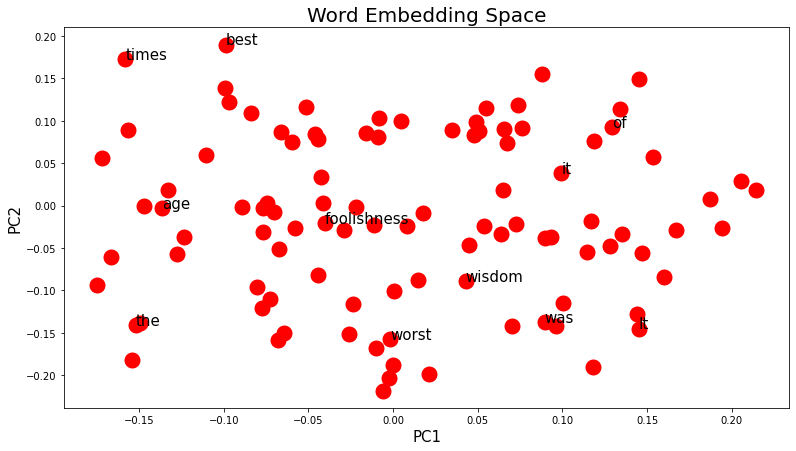

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(new_vectors[:,0],new_vectors[:,1],linewidths=10,color='red')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(words):
  plt.annotate(word,xy=(new_vectors[i,0],new_vectors[i,1]), fontsize=15)

**2.2 GloVe**

GloVe is also available to public use by gensim api. Since its algorithm depends on global vector representation, it is expected to have different embedding by using it. An example implementation for the given poem is placed below.

In [ ]:
import gensim.downloader as api
# Lets download a 25 dimensional GloVe representation of 2 Billion tweets
# Info on this & other embeddings : <https://nlp.stanford.edu/projects/glove/>
# Gensim provides an awesome interface to easily download pre-trained embeddings
# > 100MB to be downloaded
twitter_glove = api.load("glove-twitter-25")


[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
# To find most similar words
# Note : All outputs are lowercased. If you use upper case letters, it will throw out of vocab error
X = []
for token in tokens[0]:
    X.append(twitter_glove.get_vector(token.lower()))
df = pd.DataFrame(X)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.167580,0.214340,-0.093086,0.16379,-0.600010,-0.037103,1.85770,-0.24306,-0.44864,0.287340,-0.43609,1.08390,-6.0385,-0.148720,0.318430,0.08263,0.47562,-0.500900,-0.099384,-0.18034,-0.10614,0.152380,0.325320,0.73795,-0.408590
1,-0.160630,0.021235,0.956950,-1.06420,-0.424960,0.070767,0.88473,-0.38835,-0.96585,-0.032367,0.24310,1.46820,-5.7357,-0.316110,0.590850,0.33569,0.92369,1.045700,-0.968560,-0.30444,0.65033,0.940530,-0.003684,0.14969,0.384080
2,-0.010167,0.020194,0.214730,0.17289,-0.436590,-0.146870,1.84290,-0.15753,0.18187,-0.317820,0.06839,0.51776,-6.3371,0.480660,0.137770,-0.48568,0.39000,-0.001951,-0.102180,0.21262,-0.86146,0.172630,0.187830,-0.84250,-0.312080
3,0.231660,0.048825,0.290170,-0.76236,0.234110,0.582690,1.58320,0.55082,-0.20978,-0.566940,-0.30596,0.50974,-4.8382,-0.002327,-0.219060,0.23636,0.60195,-0.819470,-0.451990,0.56327,-0.76506,0.036199,-1.072900,0.44869,-0.274400
4,0.325430,-0.089637,-0.147330,0.42850,-0.092613,-0.179380,1.28350,-0.59714,-0.28134,-0.048954,0.54827,0.69410,-6.1200,0.672400,0.018078,-0.24165,0.50342,0.653250,-0.206740,0.27639,-0.79097,0.104320,-0.617500,-0.54592,-0.069893


In [ ]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1769: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1771: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:828: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:829: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:690: ComplexWarning: Casting

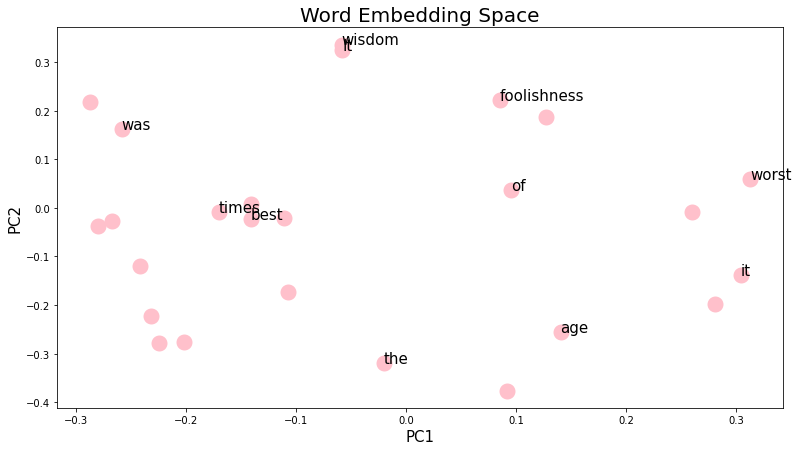

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(new_vectors[:,0],new_vectors[:,1],linewidths=10,color='pink')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
for i, word in enumerate(words):
  plt.annotate(word,xy=(new_vectors[i,0],new_vectors[i,1]), fontsize=15)

### **Results**
GloVe tends to outperform Word2Vec in analogy tasks. Furthermore, it considers word pair to word pair relationship while constructing the vectors. Hence, GloVe tends to add more meaning to the vectors when compared to vectors constructed from word to word relationships. Also, GloVe has shorter training time comparing to Word2Vec while it costs computationally more because of the utilization of co-occurence matrix and global information. 